PLEASE CHANGE orgSize, processedSize and save file name!!

In [1]:
import tensorflow as tf
from PIL import Image
from skimage import io
import numpy as np
import IPython.display as display
import glob, os
import matplotlib.pyplot as plt


In [17]:
totalFileList = []
orgSize = [512,512]
processedSize = [512,512]

#specify where and filename of the tfrecord file to be saved
Fname="TFrecord/trainval"
#the input file of dataset images
folder="512ResizedFullyDivided/"
#the folder that contained the filelist txt
folder2="ImageSets/"
#the name of the filelist txt to work on
WorkFile="trainval1.txt"

FileList=[]
tmp=[]
FileListA=[]

with open(folder2+WorkFile) as l:
    FileList=l.readlines()
for items in FileList:
    FileListA.append(items.rstrip("\n"))

#print(FileListA)

for file in FileListA:
    #print(file)
    totalFileList.append({"file_name":file,"img":folder+"/img/"+file+".png","segmentation_mask":folder+"/masks_machine/"+file+".png","png":folder+"/img/"+file+".png"})
print(totalFileList)



[{'file_name': 'Opening wound to nerveM3L.mp4_000103.695.jpg', 'img': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/img/Opening wound to nerveM3L.mp4_000103.695.jpg.png', 'segmentation_mask': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/masks_machine/Opening wound to nerveM3L.mp4_000103.695.jpg.png', 'png': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/img/Opening wound to nerveM3L.mp4_000103.695.jpg.png'}, {'file_name': 'Opening wound to nerveM2L.mp4_000051.663.jpg', 'img': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/img/Opening wound to nerveM2L.mp4_000051.663.jpg.png', 'segmentation_mask': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/masks_machine/Opening wound to nerveM2L.mp4_000051.663.jpg.png', 'png': 'H:/FYP data/Marco_segmentation_alldata/512ResizedFullyDivided/img/Opening wound to nerveM2L.mp4_000051.663.jpg.png'}, {'file_name': 'Opening wound_to_nerve000107.965', 'img': 'H:/FYP data/Marco

In [18]:
len(totalFileList)

4886

In [19]:
image_string = open(totalFileList[0]['segmentation_mask'], 'rb').read()

def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string,segmentation_mask_string,file_name):
    #image_shape = tf.image.decode_jpeg(image_string).shape
    #print('image_shape:',image_shape)
    feature = {
        'height': _int64_feature(orgSize[0]),
      'width': _int64_feature(orgSize[1]),
      'depth': _int64_feature(3),
       'depth_segmentation': _int64_feature(1),
      #'label': _int64_feature(label),
      'image': _bytes_feature(image_string),
        'segmentation_mask': _bytes_feature(segmentation_mask_string),
        'file_name': _bytes_feature(file_name)
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

In [20]:
record_file = Fname+'.tfrecords'
filecount = 0
with tf.io.TFRecordWriter(record_file) as writer:
  for item in totalFileList:
    #image_string = open(item['img'], 'rb').read()
    #try:
    image_string=Image.open(item['img']).tobytes()
    #except:
        #image_string=Image.open(item['png']).tobytes()
    #print("image_string:",image_string)
    segmentation_mask_string_array=Image.open(item['segmentation_mask'])
    r=segmentation_mask_string_array.split()[0]
    print("r:",np.array(r).shape)
    segmentation_mask_string = r.tobytes()
    #segmentation_mask_string = open(item['segmentation_mask'], 'rb').read()
    print('file_name encode',item["file_name"].encode())
    tf_example = image_example(image_string, segmentation_mask_string, item["file_name"].encode())
    writer.write(tf_example.SerializeToString())
    filecount = filecount +1
    print(filecount)
    os.rename(item['img'], item['img']+".done")
    os.rename(item['segmentation_mask'], item['segmentation_mask']+".done")
print("Successfully converted: ")
print(filecount)

r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000103.695.jpg'
1
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000051.663.jpg'
2
r: (512, 512)
file_name encode b'Opening wound_to_nerve000107.965'
3
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000058.967'
4
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000040.916.jpg'
5
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000009.713'
6
r: (512, 512)
file_name encode b'nerve000012.099.jpg'
7
r: (512, 512)
file_name encode b'NerveM3L.mp4_000046.907.jpg'
8
r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000053.496.jpg'
9
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000009.061'
10
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000108.593.jpg'
11
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000131.314.jpg'
12
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000059.467'
13
r: (512, 512)
file_name encode b'Transection_of_

r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000054.895'
116
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000042.234'
117
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000111.457.jpg'
118
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000036.721.jpg'
119
r: (512, 512)
file_name encode b'NerveM3R.mp4_000017.451.jpg'
120
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000025.881.jpg'
121
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000048.107.jpg'
122
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000057.717'
123
r: (512, 512)
file_name encode b'NerveM2R.mp4_000012.722.jpg'
124
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000110.319.jpg'
125
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000000.711.jpg'
126
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000027.051.jpg'
127
r: (512, 512)
file_name encode b'NerveM2R.mp4_000101.382.jpg'
128


233
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000045.056'
234
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000100.723'
235
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000059.491.jpg'
236
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000049.915'
237
r: (512, 512)
file_name encode b'nerve000143.907.jpg'
238
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000009.846'
239
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000047.466'
240
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000044.603'
241
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000015.752.jpg'
242
r: (512, 512)
file_name encode b'nerve000142.063.jpg'
243
r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000048.684.jpg'
244
r: (512, 512)
file_name encode b'NerveM3R.mp4_000116.871.jpg'
245
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000046.295.jpg'
246
r: (512, 512)
file_name encode b'

351
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000010.864.jpg'
352
r: (512, 512)
file_name encode b'NerveM1R.mp4_000130.123.jpg'
353
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000049.303'
354
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000036.064.jpg'
355
r: (512, 512)
file_name encode b'Transection_of_nerve000033.727'
356
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000117.562'
357
r: (512, 512)
file_name encode b'Opening wound to nerve000147.464.jpg'
358
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000012.713.jpg'
359
r: (512, 512)
file_name encode b'Nerve000025.220'
360
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000039.107'
361
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000041.581'
362
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000051.101.jpg'
363
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000009.719.jpg'
364
r: (512, 512)
file_n

468
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000012.764.jpg'
469
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000053.595'
470
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000052.903.jpg'
471
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000047.482'
472
r: (512, 512)
file_name encode b'NerveM3L.mp4_000110.895.jpg'
473
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000016.948'
474
r: (512, 512)
file_name encode b'Transection_of_nerve000033.698.jpg'
475
r: (512, 512)
file_name encode b'Opening wound to nerve000113.293.jpg'
476
r: (512, 512)
file_name encode b'nerve000210.279.jpg'
477
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000052.326.jpg'
478
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000022.900.jpg'
479
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000009.060.jpg'
480
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000058.355.jpg'
481
r: (51

585
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000043.294.jpg'
586
r: (512, 512)
file_name encode b'NerveM3L.mp4_000100.693.jpg'
587
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000024.108'
588
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000031.319'
589
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000055.889.jpg'
590
r: (512, 512)
file_name encode b'NerveM1L.mp4_000038.558.jpg'
591
r: (512, 512)
file_name encode b'Opening wound_to_nerve000025.951'
592
r: (512, 512)
file_name encode b'NerveM3R.mp4_000022.254.jpg'
593
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000052.888.jpg'
594
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000015.054.jpg'
595
r: (512, 512)
file_name encode b'NerveM3R.mp4_000056.471.jpg'
596
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000050.540'
597
r: (512, 512)
file_name encode b'NerveM1R.mp4_000026.514.jpg'
598
r: (512, 512)
file_name encode b'Transection_of_nerv

701
r: (512, 512)
file_name encode b'nerve000009.114.jpg'
702
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000019.342'
703
r: (512, 512)
file_name encode b'nerve000056.461.jpg'
704
r: (512, 512)
file_name encode b'Opening wound to nerve000101.276.jpg'
705
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000102.504.jpg'
706
r: (512, 512)
file_name encode b'NerveM1L.mp4_000055.956.jpg'
707
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000045.065'
708
r: (512, 512)
file_name encode b'NerveM1L.mp4_000049.942.jpg'
709
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000003.714.jpg'
710
r: (512, 512)
file_name encode b'nerve000139.721.jpg'
711
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000044.452'
712
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000116.250.jpg'
713
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000052.904'
714
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000025.256

r: (512, 512)
file_name encode b'Nerve000034.768'
827
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000031.292.jpg'
828
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000011.515'
829
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000028.861.jpg'
830
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000029.509.jpg'
831
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000051.796'
832
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000037.291.jpg'
833
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000054.067.jpg'
834
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000113.965'
835
r: (512, 512)
file_name encode b'NerveM3R.mp4_000043.882.jpg'
836
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000013.383'
837
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000027.734.jpg'
838
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000104.280'
839
r: (512, 512)
file_name enco

944
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000051.119.jpg'
945
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000011.474'
946
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000043.894'
947
r: (512, 512)
file_name encode b'NerveM1R.mp4_000044.001.jpg'
948
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000102.492'
949
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000042.707'
950
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000030.105.jpg'
951
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000002.525'
952
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000054.128.jpg'
953
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000054.725'
954
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000044.454.jpg'
955
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000107.265.jpg'
956
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000007.366'
957
r: (512, 512)
file_name encode b'Openin

1063
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000103.060.jpg'
1064
r: (512, 512)
file_name encode b'NerveM1L.mp4_000034.364.jpg'
1065
r: (512, 512)
file_name encode b'NerveM1R.mp4_000146.359.jpg'
1066
r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000117.454.jpg'
1067
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000031.273.jpg'
1068
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000019.284.jpg'
1069
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000112.662.jpg'
1070
r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000031.265.jpg'
1071
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000010.919'
1072
r: (512, 512)
file_name encode b'NerveM3L.mp4_000036.084.jpg'
1073
r: (512, 512)
file_name encode b'Nerve000013.777'
1074
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000117.475'
1075
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000004.313'
1076
r: (512, 512)
file_name encode 

1181
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000057.688'
1182
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000101.318.jpg'
1183
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000015.071.jpg'
1184
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000003.701.jpg'
1185
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000053.465'
1186
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000048.094.jpg'
1187
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000030.661.jpg'
1188
r: (512, 512)
file_name encode b'nerve000013.289.jpg'
1189
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000033.038'
1190
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000049.864.jpg'
1191
r: (512, 512)
file_name encode b'NerveM3R.mp4_000020.460.jpg'
1192
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000026.499.jpg'
1193
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000103.1

1297
r: (512, 512)
file_name encode b'Nerve000039.171'
1298
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000056.467'
1299
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000115.158'
1300
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000021.680.jpg'
1301
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000053.477'
1302
r: (512, 512)
file_name encode b'nerve000150.480.jpg'
1303
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000049.866'
1304
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000100.069'
1305
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000114.618'
1306
r: (512, 512)
file_name encode b'NerveM3L.mp4_000016.894.jpg'
1307
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000027.713'
1308
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000045.725.jpg'
1309
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000049.374.jpg'
1310
r: (512, 512)
file_name encode b

1414
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000042.727'
1415
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000100.728'
1416
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000048.068.jpg'
1417
r: (512, 512)
file_name encode b'Opening wound to nerve000109.063.jpg'
1418
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000031.288'
1419
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000113.867'
1420
r: (512, 512)
file_name encode b'NerveM2R.mp4_000106.729.jpg'
1421
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000104.393'
1422
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000129.459.jpg'
1423
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000028.921'
1424
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000111.522'
1425
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000037.984'
1426
r: (512, 512)
file_name encode b'Transection_of_nerve000018.0

r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000039.833'
1531
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000031.310'
1532
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000010.312.jpg'
1533
r: (512, 512)
file_name encode b'nerve000216.264.jpg'
1534
r: (512, 512)
file_name encode b'NerveM3L.mp4_000040.348.jpg'
1535
r: (512, 512)
file_name encode b'Opening wound to nerve000058.929.jpg'
1536
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000008.463'
1537
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000107.927'
1538
r: (512, 512)
file_name encode b'Nerve000007.359'
1539
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000045.116'
1540
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000043.318'
1541
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000040.884'
1542
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000012.835'
1543
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000036.70

1643
r: (512, 512)
file_name encode b'NerveM1L.mp4_000001.368.jpg'
1644
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000057.076'
1645
r: (512, 512)
file_name encode b'Nerve000022.761'
1646
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000122.289.jpg'
1647
r: (512, 512)
file_name encode b'Nerve000016.767'
1648
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000052.909'
1649
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000055.888.jpg'
1650
r: (512, 512)
file_name encode b'NerveM2L.mp4_000058.306.jpg'
1651
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000033.665'
1652
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000015.046'
1653
r: (512, 512)
file_name encode b'NerveM2L.mp4_000016.328.jpg'
1654
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000115.691'
1655
r: (512, 512)
file_name encode b'NerveM3R.mp4_000048.137.jpg'
1656
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000042.143'
1657
r: (512, 512)
file_name

r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000047.496'
1763
r: (512, 512)
file_name encode b'NerveM1R.mp4_000052.405.jpg'
1764
r: (512, 512)
file_name encode b'NerveM1R.mp4_000100.187.jpg'
1765
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000020.499'
1766
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000103.109.jpg'
1767
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000001.254.jpg'
1768
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000012.131'
1769
r: (512, 512)
file_name encode b'Nerve000055.200'
1770
r: (512, 512)
file_name encode b'Nerve000024.129'
1771
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000055.903.jpg'
1772
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000120.498.jpg'
1773
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000036.748'
1774
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000059.545'
1775
r: (512, 512)
file_name encode b'NerveM2L.mp4_000019.911.jpg'
1776
r: (512, 512)
file_name enco

r: (512, 512)
file_name encode b'Nerve000040.957'
1880
r: (512, 512)
file_name encode b'NerveM1R.mp4_000128.328.jpg'
1881
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000006.063'
1882
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000000.662.jpg'
1883
r: (512, 512)
file_name encode b'Opening wound_to_nerve000024.699'
1884
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000124.737.jpg'
1885
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000010.372'
1886
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000021.698'
1887
r: (512, 512)
file_name encode b'Opening wound_to_nerve000029.530'
1888
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000113.311'
1889
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000054.683.jpg'
1890
r: (512, 512)
file_name encode b'nerve000006.112.jpg'
1891
r: (512, 512)
file_name encode b'Opening wound_to_nerve000017.555'
1892
r: (512, 512)
file_name encode b'Transection_of_nerve000011.470.jpg'
1893
r: (5

r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000006.719'
1997
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000101.288.jpg'
1998
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000045.804'
1999
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000039.193.jpg'
2000
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000057.742'
2001
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000103.680'
2002
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000105.461'
2003
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000110.310.jpg'
2004
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000011.564'
2005
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000050.448'
2006
r: (512, 512)
file_name encode b'nerve000101.312.jpg'
2007
r: (512, 512)
file_name encode b'NerveM3R.mp4_000103.725.jpg'
2008
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000051.085'
2009
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000042.150.jpg'
201

r: (512, 512)
file_name encode b'Nerve000121.585'
2114
r: (512, 512)
file_name encode b'NerveM1L.mp4_000123.547.jpg'
2115
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000027.694'
2116
r: (512, 512)
file_name encode b'NerveM2L.mp4_000011.466.jpg'
2117
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000043.249.jpg'
2118
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000039.755'
2119
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000026.039'
2120
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000028.297.jpg'
2121
r: (512, 512)
file_name encode b'Opening wound_to_nerve000104.915'
2122
r: (512, 512)
file_name encode b'NerveM3L.mp4_000004.868.jpg'
2123
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000023.507.jpg'
2124
r: (512, 512)
file_name encode b'Nerve000022.393'
2125
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000109.691'
2126
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000056

r: (512, 512)
file_name encode b'NerveM1L.mp4_000000.116.jpg'
2231
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000059.481'
2232
r: (512, 512)
file_name encode b'Transection_of_nerve000038.570'
2233
r: (512, 512)
file_name encode b'Nerve000053.403'
2234
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000037.890.jpg'
2235
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000103.675'
2236
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000033.684'
2237
r: (512, 512)
file_name encode b'Transection_of_nerve000038.533.jpg'
2238
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000127.767'
2239
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000014.464'
2240
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000024.683'
2241
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000128.865.jpg'
2242
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000033.064'
2243
r: (512, 512)
file_name encode

2344
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000024.057'
2345
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000120.521.jpg'
2346
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000047.499.jpg'
2347
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000042.753'
2348
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000104.287'
2349
r: (512, 512)
file_name encode b'nerve000037.906.jpg'
2350
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000012.122.jpg'
2351
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000041.502'
2352
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000053.487'
2353
r: (512, 512)
file_name encode b'Transection_of_nerve000002.570'
2354
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000115.122.jpg'
2355
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000013.253.jpg'
2356
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000045.704.jpg'
2357
r: (512, 512)
file_na

r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000112.760'
2459
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000041.494.jpg'
2460
r: (512, 512)
file_name encode b'NerveM3L.mp4_000018.753.jpg'
2461
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000033.046'
2462
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000013.906'
2463
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000031.868'
2464
r: (512, 512)
file_name encode b'Nerve000106.033'
2465
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000013.935'
2466
r: (512, 512)
file_name encode b'NerveM2R.mp4_000024.719.jpg'
2467
r: (512, 512)
file_name encode b'Transection_of_Nerve000024.676'
2468
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000022.903'
2469
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000103.099.jpg'
2470
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000022.257'
2471
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000048.044'
2472
r: (512, 512)
file_na

2573
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000100.668.jpg'
2574
r: (512, 512)
file_name encode b'NerveM3L.mp4_000110.286.jpg'
2575
r: (512, 512)
file_name encode b'NerveM1L.mp4_000139.143.jpg'
2576
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000043.916'
2577
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000107.315.jpg'
2578
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000037.311.jpg'
2579
r: (512, 512)
file_name encode b'NerveM3R.mp4_000052.876.jpg'
2580
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000049.876'
2581
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000010.263'
2582
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000040.863'
2583
r: (512, 512)
file_name encode b'NerveM3L.mp4_000028.284.jpg'
2584
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000113.918.jpg'
2585
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000101.835'
2586
r: (512, 512)
file_name encode b'Tr

2694
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000027.736'
2695
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000038.546'
2696
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000027.054.jpg'
2697
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000113.931'
2698
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000107.909.jpg'
2699
r: (512, 512)
file_name encode b'NerveM1R.mp4_000123.531.jpg'
2700
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000029.641'
2701
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000032.477'
2702
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000014.584.jpg'
2703
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000049.897.jpg'
2704
r: (512, 512)
file_name encode b'Transection_of_nerve000036.076.jpg'
2705
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000034.378'
2706
r: (512, 512)
file_name encode b'NerveM3L.mp4_000015.094.jpg'
2707
r: (512, 512)
f

2814
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000055.908'
2815
r: (512, 512)
file_name encode b'NerveM3L.mp4_000022.287.jpg'
2816
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000034.283.jpg'
2817
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000055.319.jpg'
2818
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000033.669'
2819
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000113.273'
2820
r: (512, 512)
file_name encode b'NerveM3R.mp4_000109.664.jpg'
2821
r: (512, 512)
file_name encode b'NerveM3R.mp4_000006.046.jpg'
2822
r: (512, 512)
file_name encode b'NerveM3R.mp4_000121.672.jpg'
2823
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000004.258'
2824
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000008.604'
2825
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000043.872'
2826
r: (512, 512)
file_name encode b'NerveM3L.mp4_000009.111.jpg'
2827
r: (512, 512)
file_name encode b'N

r: (512, 512)
file_name encode b'Transection_of_nerve000036.072'
2928
r: (512, 512)
file_name encode b'Transection_of_nerveM3R.mp4_000046.864.jpg'
2929
r: (512, 512)
file_name encode b'Opening wound_to_nerve000043.922'
2930
r: (512, 512)
file_name encode b'NerveM3R.mp4_000034.290.jpg'
2931
r: (512, 512)
file_name encode b'nerve000140.314.jpg'
2932
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000025.299'
2933
r: (512, 512)
file_name encode b'NerveM1R.mp4_000053.546.jpg'
2934
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000013.275.jpg'
2935
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000007.915'
2936
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000016.310.jpg'
2937
r: (512, 512)
file_name encode b'NerveM2R.mp4_000107.924.jpg'
2938
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000028.958.jpg'
2939
r: (512, 512)
file_name encode b'Nerve000028.226'
2940
r: (512, 512)
file_name encode b'nerve000043.895.jpg'
2941
r: (512, 

r: (512, 512)
file_name encode b'Nerve000025.830'
3040
r: (512, 512)
file_name encode b'NerveM3R.mp4_000110.276.jpg'
3041
r: (512, 512)
file_name encode b'Nerve000038.561'
3042
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000036.162'
3043
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000030.706.jpg'
3044
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000028.940.jpg'
3045
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000115.714'
3046
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000027.250'
3047
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000038.480'
3048
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000051.771.jpg'
3049
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000033.111'
3050
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000028.264.jpg'
3051
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000021.692.jpg'
3052
r: (512, 512)
file_name encode b

r: (512, 512)
file_name encode b'NerveM1R.mp4_000127.782.jpg'
3154
r: (512, 512)
file_name encode b'nerve000023.485.jpg'
3155
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000007.389'
3156
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000110.916.jpg'
3157
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000036.069'
3158
r: (512, 512)
file_name encode b'nerve000215.671.jpg'
3159
r: (512, 512)
file_name encode b'NerveM1R.mp4_000112.103.jpg'
3160
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000110.314.jpg'
3161
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000003.114'
3162
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000115.060'
3163
r: (512, 512)
file_name encode b'Transection_of_nerve000000.063'
3164
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000100.704.jpg'
3165
r: (512, 512)
file_name encode b'Transection_of_Nerve000015.037'
3166
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000025.957

r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000011.471.jpg'
3267
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000042.674'
3268
r: (512, 512)
file_name encode b'Opening wound_to_nerve000018.085'
3269
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000027.076.jpg'
3270
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000051.665'
3271
r: (512, 512)
file_name encode b'Nerve000058.978'
3272
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000117.526'
3273
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000039.096'
3274
r: (512, 512)
file_name encode b'NerveM1L.mp4_000116.998.jpg'
3275
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000111.556'
3276
r: (512, 512)
file_name encode b'Nerve000020.428'
3277
r: (512, 512)
file_name encode b'Transection_of_nerve000001.975'
3278
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000052.923.jpg'
3279
r: (512, 512)
file_name encode b'Opening wound to 

3377
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000119.959'
3378
r: (512, 512)
file_name encode b'Nerve000113.845'
3379
r: (512, 512)
file_name encode b'NerveM1L.mp4_000005.020.jpg'
3380
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000127.153'
3381
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000016.961'
3382
r: (512, 512)
file_name encode b'nerve000058.916.jpg'
3383
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000032.504'
3384
r: (512, 512)
file_name encode b'Opening wound_to_nerve000015.102'
3385
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000055.894.jpg'
3386
r: (512, 512)
file_name encode b'NerveM2L.mp4_000107.971.jpg'
3387
r: (512, 512)
file_name encode b'Opening wound_to_nerve000026.499'
3388
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000108.573'
3389
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000013.312'
3390
r: (512, 512)
file_name encode b'Nerve000054.132'
3391
r

r: (512, 512)
file_name encode b'NerveM1L.mp4_000031.357.jpg'
3495
r: (512, 512)
file_name encode b'Nerve000045.757'
3496
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000017.496'
3497
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000152.922.jpg'
3498
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000034.350'
3499
r: (512, 512)
file_name encode b'Opening wound to nerve000109.718.jpg'
3500
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000025.896'
3501
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000000.051'
3502
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000042.765'
3503
r: (512, 512)
file_name encode b'NerveM1L.mp4_000036.754.jpg'
3504
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000004.874'
3505
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000003.722'
3506
r: (512, 512)
file_name encode b'NerveM1L.mp4_000128.328.jpg'
3507
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000119.942.jpg'
3508
r: (512, 512)
file_n

r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000038.506'
3613
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000009.061'
3614
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000010.310'
3615
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000109.679'
3616
r: (512, 512)
file_name encode b'NerveM2R.mp4_000004.918.jpg'
3617
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000000.069'
3618
r: (512, 512)
file_name encode b'Opening wound to nerve000119.890.jpg'
3619
r: (512, 512)
file_name encode b'NerveM3R.mp4_000100.671.jpg'
3620
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000053.489'
3621
r: (512, 512)
file_name encode b'nerve000129.475.jpg'
3622
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000104.861'
3623
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000037.280'
3624
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000058.895.jpg'
3625
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000012.109'
3626
r: (512, 512)
file_name encod

r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000001.258'
3732
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000042.722.jpg'
3733
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000042.119.jpg'
3734
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000107.250'
3735
r: (512, 512)
file_name encode b'Nerve000011.382'
3736
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000104.272.jpg'
3737
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000019.892'
3738
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000009.720.jpg'
3739
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000056.485.jpg'
3740
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000017.506'
3741
r: (512, 512)
file_name encode b'Nerve000104.246'
3742
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp4_000118.100.jpg'
3743
r: (512, 512)
file_name encode b'NerveM2L.mp4_000104.309.jpg'
3744
r: (512, 512)
fil

r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000058.272'
3846
r: (512, 512)
file_name encode b'nerve000143.297.jpg'
3847
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000015.088'
3848
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000019.899'
3849
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000007.855'
3850
r: (512, 512)
file_name encode b'Nerve000100.050'
3851
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000052.296'
3852
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000031.902'
3853
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000003.676'
3854
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000019.965'
3855
r: (512, 512)
file_name encode b'NerveM3L.mp4_000107.943.jpg'
3856
r: (512, 512)
file_name encode b'NerveM3R.mp4_000007.251.jpg'
3857
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1R.mp4_000049.959'
3858
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000001.2

r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000000.053'
3963
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000017.564'
3964
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000118.113'
3965
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000116.290'
3966
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000022.866.jpg'
3967
r: (512, 512)
file_name encode b'nerve000049.274.jpg'
3968
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000025.885.jpg'
3969
r: (512, 512)
file_name encode b'Transection_of_nerve000034.277.jpg'
3970
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000009.704'
3971
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000121.661.jpg'
3972
r: (512, 512)
file_name encode b'Opening wound_to_nerve000114.505'
3973
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000121.101.jpg'
3974
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000009.088.jpg'
3975
r: (512, 512)
file

4084
r: (512, 512)
file_name encode b'NerveM1R.mp4_000051.747.jpg'
4085
r: (512, 512)
file_name encode b'Opening wound_to_nerve000028.888'
4086
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000125.859.jpg'
4087
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000041.637'
4088
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000123.521'
4089
r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000031.377'
4090
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000101.903.jpg'
4091
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000119.266'
4092
r: (512, 512)
file_name encode b'Opening wound to nerveM3L.mp4_000049.890.jpg'
4093
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000035.533'
4094
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000031.269.jpg'
4095
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000047.527'
4096
r: (512, 512)
file_name encode b'Opening wound to nerveM3R.mp

4199
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000051.681'
4200
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000040.293'
4201
r: (512, 512)
file_name encode b'Transection_of_nerve000039.081.jpg'
4202
r: (512, 512)
file_name encode b'Transection_of_nerveM1R.mp4_000039.714.jpg'
4203
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000037.874'
4204
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000105.583'
4205
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000124.104'
4206
r: (512, 512)
file_name encode b'Opening wound_to_nerve000108.510'
4207
r: (512, 512)
file_name encode b'NerveM1L.mp4_000034.956.jpg'
4208
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000054.697'
4209
r: (512, 512)
file_name encode b'NerveM1L.mp4_000130.134.jpg'
4210
r: (512, 512)
file_name encode b'Nerve-M2L.mp4_000003.773'
4211
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000101.904.jpg'
4212
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000013.3

r: (512, 512)
file_name encode b'NerveM1L.mp4_000019.360.jpg'
4318
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000104.917'
4319
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000023.466'
4320
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000006.729.jpg'
4321
r: (512, 512)
file_name encode b'NerveM3L.mp4_000102.540.jpg'
4322
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000127.127.jpg'
4323
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000007.864'
4324
r: (512, 512)
file_name encode b'NerveM2R.mp4_000052.310.jpg'
4325
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000049.861.jpg'
4326
r: (512, 512)
file_name encode b'Nerve000029.966'
4327
r: (512, 512)
file_name encode b'Transection of nerve-M1R.mp4_000025.892'
4328
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000014.609.jpg'
4329
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000149.922.jpg'
4330
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4

r: (512, 512)
file_name encode b'Opening wound to nerve-M2L.mp4_000121.801'
4432
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000045.674'
4433
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000035.503'
4434
r: (512, 512)
file_name encode b'Opening wound to nerve000138.469.jpg'
4435
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000054.719'
4436
r: (512, 512)
file_name encode b'NerveM3R.mp4_000001.913.jpg'
4437
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000015.106.jpg'
4438
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000017.457.jpg'
4439
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000027.748.jpg'
4440
r: (512, 512)
file_name encode b'Opening wound to nerve-M3L.mp4_000100.114'
4441
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000003.722.jpg'
4442
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000102.480'
4443
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp

4544
r: (512, 512)
file_name encode b'Opening wound to nerve-M2R.mp4_000111.511'
4545
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000025.303.jpg'
4546
r: (512, 512)
file_name encode b'NerveM3R.mp4_000054.674.jpg'
4547
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000108.511.jpg'
4548
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000058.341'
4549
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000025.321'
4550
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000103.721'
4551
r: (512, 512)
file_name encode b'Nerve-M1R.mp4_000038.461'
4552
r: (512, 512)
file_name encode b'NerveM3R.mp4_000041.487.jpg'
4553
r: (512, 512)
file_name encode b'Nerve000059.392'
4554
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000103.065.jpg'
4555
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000003.719'
4556
r: (512, 512)
file_name encode b'Nerve-M2R.mp4_000007.256'
4557
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_0000

4657
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000051.688.jpg'
4658
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000048.705'
4659
r: (512, 512)
file_name encode b'NerveM3R.mp4_000035.493.jpg'
4660
r: (512, 512)
file_name encode b'Transection_of_nerve000017.462.jpg'
4661
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000058.391'
4662
r: (512, 512)
file_name encode b'Opening wound to nerveM2L.mp4_000000.707.jpg'
4663
r: (512, 512)
file_name encode b'Transection of nerve-M1L.mp4_000042.650'
4664
r: (512, 512)
file_name encode b'NerveM3R.mp4_000036.101.jpg'
4665
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000039.819.jpg'
4666
r: (512, 512)
file_name encode b'Transection_of_nerveM2L.mp4_000003.173.jpg'
4667
r: (512, 512)
file_name encode b'Opening wound to nerveM2R.mp4_000056.523.jpg'
4668
r: (512, 512)
file_name encode b'Opening Wound to nerve-M1L.mp4_000055.286'
4669
r: (512, 512)
file_name encode b'Opening_wound_to_nerve000034.941.jpg

4774
r: (512, 512)
file_name encode b'Opening wound to nerve-M1R.mp4_000046.278'
4775
r: (512, 512)
file_name encode b'Opening wound to nerve000149.305.jpg'
4776
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000048.669'
4777
r: (512, 512)
file_name encode b'Nerve000019.177'
4778
r: (512, 512)
file_name encode b'Transection_of_nerveM3L.mp4_000059.048'
4779
r: (512, 512)
file_name encode b'Nerve000006.586'
4780
r: (512, 512)
file_name encode b'Nerve-M1L.mp4_000057.084'
4781
r: (512, 512)
file_name encode b'Opening wound to nerveM1L.mp4_000042.747'
4782
r: (512, 512)
file_name encode b'Nerve-M3L.mp4_000108.579'
4783
r: (512, 512)
file_name encode b'Transection_of_nerveM1L.mp4_000022.267.jpg'
4784
r: (512, 512)
file_name encode b'Opening wound to nerveM1R.mp4_000028.939.jpg'
4785
r: (512, 512)
file_name encode b'NerveM1R.mp4_000001.963.jpg'
4786
r: (512, 512)
file_name encode b'Transection_of_nerveM2R.mp4_000100.714.jpg'
4787
r: (512, 512)
file_name encode b'Transection_of_n

Successfully converted: 
4886


In [21]:
raw_image_dataset = tf.data.TFRecordDataset(Fname+'.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'depth_segmentation': tf.io.FixedLenFeature([], tf.int64),
    #'label': tf.io.FixedLenFeature([], tf.int64),
    'image': tf.io.FixedLenFeature([], tf.string),
    'segmentation_mask': tf.io.FixedLenFeature([], tf.string),
    'file_name': tf.io.FixedLenFeature([], tf.string),
    
}


In [22]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    #print("raw {} display list {}".format(i,display_list[i]))
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


In [23]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255
    input_mask += 0
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    datapoint = tf.io.parse_single_example(datapoint, image_feature_description)
    print("load_image_train's datapoint",datapoint['image'])
    height = tf.cast(datapoint['height'], tf.int64)
    width = tf.cast(datapoint['width'], tf.int64)
    depth = tf.cast(datapoint['depth'], tf.int64)
    depth_segmentation = tf.cast(datapoint['depth_segmentation'], tf.int64)
    image = tf.io.decode_raw(datapoint['image'], tf.uint8)
    segmentation_mask = tf.io.decode_raw(datapoint['segmentation_mask'], tf.uint8)
    image = tf.reshape(image, [height,width,depth])
    segmentation_mask = tf.reshape(segmentation_mask, [height,width,1])
    print('image:',image)
    #_parsed['image'] = image
    #_parsed['segmentation_mask'] = segmentation_mask
    input_image = tf.image.resize(image, (processedSize[0], processedSize[1]))
    print("load_image_train's input_image",input_image)
    input_mask = tf.image.resize(segmentation_mask, (processedSize[0], processedSize[1]))
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)
    print("final input_mask:",input_mask)
    return input_image, input_mask

def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (processedSize[0], processedSize[1]))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (processedSize[0], processedSize[1]))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [24]:
BATCH_SIZE = 5
BUFFER_SIZE = 10


train = raw_image_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)

train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

load_image_train's datapoint Tensor("ParseSingleExample/ParseExample/ParseExampleV2:4", shape=(), dtype=string)
image: Tensor("Reshape:0", shape=(None, None, None), dtype=uint8)
load_image_train's input_image Tensor("resize/Squeeze:0", shape=(512, 512, None), dtype=float32)
final input_mask: Tensor("add:0", shape=(512, 512, 1), dtype=float32)


tf.Tensor(
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]], shape=(512, 512, 1), dtype=float32)


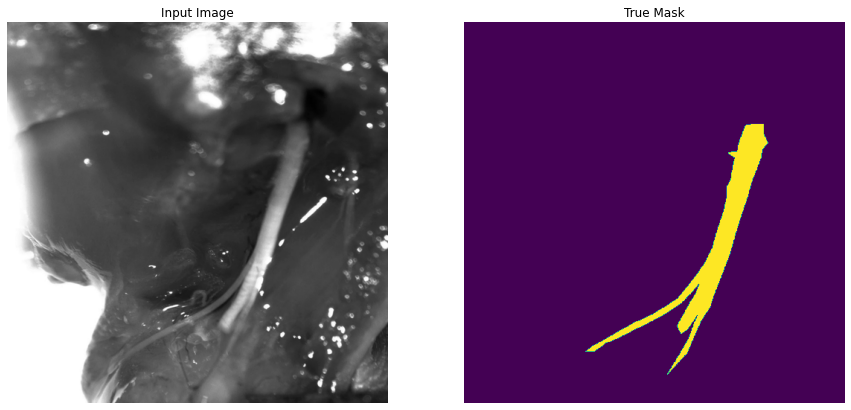

In [25]:

for item in train.take(2):
    sample_image, sample_mask = item[0], item[1]
print(sample_mask)
display([sample_image, sample_mask])